#European Union Economies and Climate 

This project explores the possible correlation Temperature and Sunlight Hours have with GDP (nominal and PPP) and average wage in the European Union. Data was sourced from wikipedia. Frameworks used to build this project are: pandas, numpy, and seaborn. 

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns

##Loading Data
In this step Data is loaded from Wikipedia. Non-EU countries are removed from the tables. The different tables used show the average yearly temperature, GDP(PPP), GDP(Nominal), average monthly income in Euros, yearly sunlight hours, and yearly precipitation rates. 

In [64]:
linkTemps = "https://en.wikipedia.org/wiki/List_of_countries_by_average_yearly_temperature" 
euC = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

tables = pd.read_html(linkTemps)
dataTemps = tables[0].iloc[0:]
dataTemps.columns = ['Country','Temperature']
euTemps = dataTemps[dataTemps['Country'].isin(euC)]
euTemps.head()


,Country,Temperature
115,Malta,19.20
117,Cyprus,18.45
126,Greece,15.40
127,Portugal,15.15
131,Italy,13.45


In [65]:
linkGDP = "https://en.wikipedia.org/wiki/List_of_sovereign_states_in_Europe_by_GDP_(PPP)_per_capita"
gdpData = pd.read_html(linkGDP)
data2 = gdpData[1]
data2.columns = ['Country','GDP(PPP)']
euGdpPPP = data2[data2['Country'].isin(euC)]
#GDP Data is loaded and non-EU countries are removed 
euGdpPPP.head()

,Country,GDP(PPP)
1,Luxembourg,126570
2,Ireland,111360
6,Denmark,63400
7,Netherlands,61820
8,Austria,59410


In [66]:
linkGDP2 = "https://en.wikipedia.org/wiki/List_of_sovereign_states_in_Europe_by_GDP_(nominal)_per_capita"
gdpData2 = pd.read_html(linkGDP2)
data3 = gdpData2[0]
data3 = data3[['Country','IMF[5]']]
data3.columns = ['Country','GDP(nominal)']
euGdpNom = data3[data3['Country'].isin(euC)]
euGdpNom.head()

,Country,GDP(nominal)
2,Austria,53859.0
4,Belgium,50103.0
5,Bulgaria,11321.0
7,Croatia,16247.0
8,Cyprus,29551.0


In [67]:
linkIncome = "https://en.wikipedia.org/wiki/List_of_European_countries_by_average_wage#European_countries_by_monthly_median_wage"
incomeData = pd.read_html(linkIncome)
dataIncome = incomeData[4]

dataIncome = dataIncome[['Location','Net, in €']]
dataIncome.columns = ['Country','Income in Euros']
euIncome = dataIncome[dataIncome['Country'].isin(euC)]

euIncome.head()

,Country,Income in Euros
2,Netherlands,"€2,498"
3,Germany,"€2,402"
4,Sweden,"€2,376"
6,Finland,"€2,195"
7,Belgium,"€2,190"


In [68]:
linkSun = "https://en.wikipedia.org/wiki/List_of_cities_in_Europe_by_sunshine_duration"
sunData = pd.read_html(linkSun)
dataSun = sunData[0]
dataSun = dataSun[['Country','Year']]
dataSun.columns = ['Country','Sunshine Hours']
dataSun.head()

,Country,Sunshine Hours
0,Albania,2544.0
1,Armenia,2474.0
2,Austria,1884.0
3,Belarus,1807.0
4,Belgium,1546.0


In [69]:
linkRain = "https://en.wikipedia.org/wiki/List_of_cities_in_Europe_by_precipitation"
rainData = pd.read_html(linkRain)
dataRain = rainData[1]
dataRain = dataRain[['Country','Year']]
dataRain.columns = ['Country','mm of Rain']
dataRain.head()

,Country,mm of Rain
0,Albania,1266.0
1,Armenia,296.0
2,Austria,651.0
3,Belarus,690.0
4,Belgium,848.0


Combining the data we want to compare into new tables. 

In [70]:
tempGDPParity = euTemps.merge(euGdpPPP, how ='left')
tempGDPParity.head()

,Country,Temperature,GDP(PPP)
0,Malta,19.20,47150
1,Cyprus,18.45,42830
2,Greece,15.40,31820
3,Portugal,15.15,36540
4,Italy,13.45,45270


In [71]:
tempGDPNominal = euTemps.merge(euGdpNom, how ='left')
tempGDPNominal.head()

,Country,Temperature,GDP(nominal)
0,Malta,19.20,31576.0
1,Cyprus,18.45,29551.0
2,Greece,15.40,19673.0
3,Portugal,15.15,25065.0
4,Italy,13.45,34997.0


In [72]:
tempIncome = euTemps.merge(euIncome, how ='left')
tempIncome.head()

,Country,Temperature,Income in Euros
0,Malta,19.20,"€1,057"
1,Cyprus,18.45,NaN
2,Greece,15.40,€841
3,Portugal,15.15,€980
4,Italy,13.45,"€1,700"


Data for Sunshine hours and Rainfall for entire countries wasn't readily available so I averaged out the data for European cities to give an estimate of data for the entire country.

In [73]:
dataSun = dataSun.groupby('Country').mean().reset_index()
dataSun = dataSun[dataSun['Country'].isin(euC)]
gdpSun = dataSun.merge(euGdpNom, how ='left')
gdpSun.head()

,Country,Sunshine Hours,GDP(nominal)
0,Austria,1884.00,53859.0
1,Belgium,1546.00,50103.0
2,Bulgaria,2177.00,11321.0
3,Croatia,2272.00,16247.0
4,Cyprus,3364.35,29551.0


In [74]:
dataRain = dataRain.groupby('Country').mean().reset_index()
dataRain = dataRain[dataRain['Country'].isin(euC)]
gdpRain = dataRain.merge(euGdpNom, how ='left')
gdpRain.head()

,Country,mm of Rain,GDP(nominal)
0,Austria,651.00,53859.0
1,Belgium,848.00,50103.0
2,Bulgaria,625.70,11321.0
3,Croatia,811.45,16247.0
4,Cyprus,342.20,29551.0


##Graphing the Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'European Union GDP(PPP) and Temperature')]

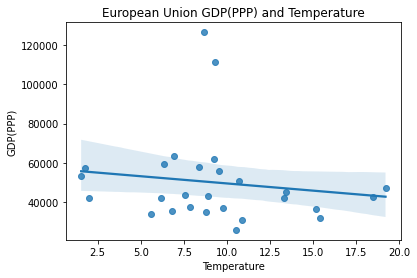

In [75]:
#Comparing GDP(PPP) with Average Yearly Temperature 
tempGDPParity['Temperature']=tempGDPParity['Temperature'].astype(float)
tempGDPParity['GDP(PPP)']=tempGDPParity['GDP(PPP)'].astype(float)
tempGDPParity=tempGDPParity.sort_values('Temperature')
sns.regplot(tempGDPParity['Temperature'],tempGDPParity['GDP(PPP)']).set(title='European Union GDP(PPP) and Temperature')

There is a slight negative correlation between GDP(PPP) and Average Yearly Temperature.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'European Union GDP(nominal) and Temperature')]

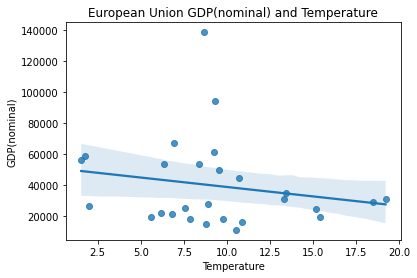

In [76]:
#Comparing GDP(nominal) with Average Yearly Temperature 
tempGDPNominal['Temperature']=tempGDPNominal['Temperature'].astype(float)
tempGDPNominal['GDP(nominal)']=tempGDPNominal['GDP(nominal)'].astype(float)
tempGDPNominal=tempGDPNominal.sort_values('Temperature')
sns.regplot(tempGDPNominal['Temperature'],tempGDPNominal['GDP(nominal)']).set(title='European Union GDP(nominal) and Temperature')

There is a slight negative correlation between GDP(nominal) and Average Yearly Temperature.

In order to graph the income data, it was necessary to remove additional symbols like the Euro sign. Countries without data were removed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'European Union Monthly Median Income and Temperature')]

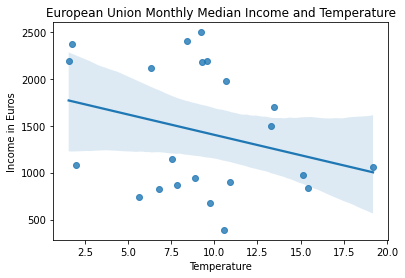

In [77]:
#Comparing median monthly income in euros to average yearly temperature in Celsius 
noData = ['NaN']
tempIncome['Income in Euros'] = tempIncome['Income in Euros'].replace({r'\€':''}, regex = True)
tempIncome['Income in Euros'] = tempIncome['Income in Euros'].replace({r'\,':''}, regex = True)
tempIncome = tempIncome[~tempIncome['Income in Euros'].isin(noData)]
tempIncome['Temperature']=tempIncome['Temperature'].astype(float)
tempIncome['Income in Euros']=tempIncome['Income in Euros'].astype(float)
tempIncome=tempIncome.sort_values('Temperature')
sns.regplot(tempIncome['Temperature'],tempIncome['Income in Euros']).set(title='European Union Monthly Median Income and Temperature')

There is a slight negative correlation between median monthly income and Average Yearly Temperature.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'European Union GDP(nominal) and Sunshine Hours')]

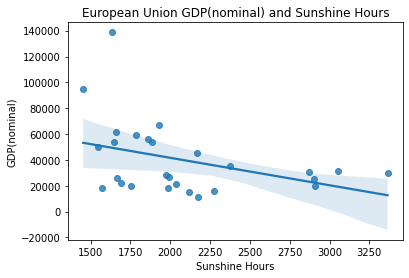

In [78]:
#Comparing estimated average yearly sunshine hours and nominal GDP
sns.regplot(gdpSun['Sunshine Hours'],gdpSun['GDP(nominal)']).set(title='European Union GDP(nominal) and Sunshine Hours')

There is a slight negative correlation between nominal GDP and Sunshine hours.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'European Union GDP(nominal) and Average Yearly Rainfall')]

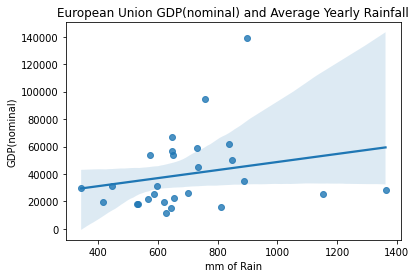

In [79]:
#Comparing estimated average yearly rainfall and nominal GDP
sns.regplot(gdpRain['mm of Rain'],gdpRain['GDP(nominal)']).set(title='European Union GDP(nominal) and Average Yearly Rainfall')

There is a slight positive correlation between nominal GDP and average yearly rainfall.

##Additional Comparisons 
Creating a correlation heatmap of most of the data points.

In [80]:
allCombined = gdpSun.merge(euTemps, how ='left')
allCombined = allCombined.merge(euIncome, how ='left')
allCombined = allCombined.merge(dataRain, how ='left')
allCombined['Temperature']=allCombined['Temperature'].astype(float)

allCombined['Income in Euros'] = allCombined['Income in Euros'].replace({r'\€':''}, regex = True)
allCombined['Income in Euros'] = allCombined['Income in Euros'].replace({r'\,':''}, regex = True)
allCombined['Income in Euros']=allCombined['Income in Euros'].astype(float)

allCombined

,Country,Sunshine Hours,GDP(nominal),Temperature,Income in Euros,mm of Rain
0,Austria,1884.000000,53859.0,6.35,2117.0,651.000000
1,Belgium,1546.000000,50103.0,9.55,2190.0,848.000000
2,Bulgaria,2177.000000,11321.0,10.55,389.0,625.700000
3,Croatia,2272.000000,16247.0,10.90,899.0,811.450000
4,Cyprus,3364.350000,29551.0,18.45,NaN,342.200000
5,Czech Republic,1668.000000,25732.0,7.55,1145.0,587.000000
6,Denmark,1932.000000,67218.0,6.95,NaN,645.700000
7,Estonia,1994.500000,26470.0,2.00,1084.0,700.000000
8,Finland,1858.000000,56391.0,1.55,2195.0,646.200000
9,France,2166.666667,44995.0,10.70,1975.0,734.650000


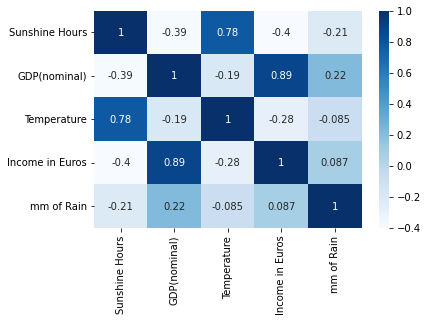

In [81]:
corr = allCombined.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="Blues", annot=True)

Comparison of the Temperature and Rain which had the smallest correlation of any 2 data sets.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


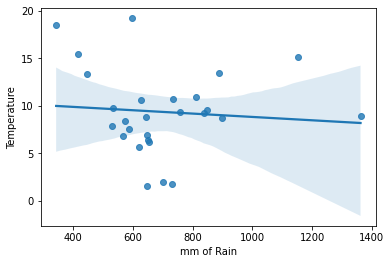

In [82]:
tempRain = dataRain.merge(euTemps, how ='left')
sns.regplot(tempRain['mm of Rain'].astype(float),tempRain['Temperature'].astype(float))

##Conclusions
There is some slight correlation between various weather events and economic outcomes for European Union countries. This could be explored further with more comparisons of more weather related variables. Likewise, a worldwide comparison would be interesting.

Of the comparison graphs, Income and Sunshine hours appeared to have the strongest correlation. Higher sunshine hours are moderately correlated with a lower median monthly income. 

